# Ethereum Fraud Detection - EDA
## 데이터 탐색 및 통계 분석

이 노트북에서는 Kaggle Ethereum Fraud Detection 데이터셋을 탐색하고, 
우리가 구성한 그래프 데이터와 비교 분석합니다.


In [2]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False


In [3]:
import opendatasets as od

# 이더리움 사기 탐지 데이터셋 다운로드
dataset_url = "https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset"
od.download(dataset_url)

print("Download complete! Check the 'data' folder.")

Skipping, found downloaded files in "./ethereum-frauddetection-dataset" (use force=True to force download)
Download complete! Check the 'data' folder.


In [4]:
# 데이터 경로 찾기
data_path = Path('./ethereum-frauddetection-dataset')
print(list(data_path.iterdir()))  # 어떤 파일들이 있는지 확인

# CSV 파일 읽기
df = pd.read_csv('./ethereum-frauddetection-dataset/transaction_dataset.csv')


[PosixPath('ethereum-frauddetection-dataset/transaction_dataset.csv')]


## 1. 데이터 기본 정보 및 컬럼 설명


이 섹션에서는 Kaggle에서 다운로드한 원본 데이터의 기본 정보를 확인합니다.
- 데이터 크기 (행 수 × 컬럼 수)
- 데이터 구조 (첫 5개 행 미리보기)


In [10]:
# 데이터 크기 및 기본 정보 확인
print(f"데이터 크기: {df.shape}")
print(f"총 {df.shape[0]:,}개 주소, {df.shape[1]}개 특징")

# 처음 5개 행 확인
df.head()

데이터 크기: (9841, 51)
총 9,841개 주소, 51개 특징


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### 1-1. 컬럼 정보 확인


In [15]:
# 컬럼 목록 확인
print("=" * 70)
print("Kaggle Ethereum Fraud Detection Dataset - 컬럼 정보")
print("=" * 70)

print(f"\n총 {len(df.columns)}개 컬럼")
print("\n[주요 컬럼]:")
print("  1. Address: 이더리움 주소")
print("  2. FLAG: 타겟 변수 (0=정상, 1=사기)")
print("  3. Sent tnx: 송금 거래 횟수")
print("  4. Received Tnx: 입금 거래 횟수")
print("  5. Unique Received From Addresses: 입금 보낸 고유 주소 수")
print("  6. Unique Sent To Addresses: 송금 받은 고유 주소 수")
print("  7-17. min/max/avg val received/sent: 거래 금액 통계")
print("  ... 및 44개 추가 특징")

print("\n[컬럼 목록]:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")


Kaggle Ethereum Fraud Detection Dataset - 컬럼 정보

총 51개 컬럼

[주요 컬럼]:
  1. Address: 이더리움 주소
  2. FLAG: 타겟 변수 (0=정상, 1=사기)
  3. Sent tnx: 송금 거래 횟수
  4. Received Tnx: 입금 거래 횟수
  5. Unique Received From Addresses: 입금 보낸 고유 주소 수
  6. Unique Sent To Addresses: 송금 받은 고유 주소 수
  7-17. min/max/avg val received/sent: 거래 금액 통계
  ... 및 44개 추가 특징

[컬럼 목록]:
   1. Unnamed: 0
   2. Index
   3. Address
   4. FLAG
   5. Avg min between sent tnx
   6. Avg min between received tnx
   7. Time Diff between first and last (Mins)
   8. Sent tnx
   9. Received Tnx
  10. Number of Created Contracts
  11. Unique Received From Addresses
  12. Unique Sent To Addresses
  13. min value received
  14. max value received 
  15. avg val received
  16. min val sent
  17. max val sent
  18. avg val sent
  19. min value sent to contract
  20. max val sent to contract
  21. avg value sent to contract
  22. total transactions (including tnx to create contract
  23. total Ether sent
  24. total ether received
  25. total ether

### 1-2. 데이터 샘플 확인


## 2. Kaggle 데이터 FLAG 분포 분석
### 목적: 원본 데이터의 사기/정상 클래스 분포 확인


In [6]:
import json

print('=' * 70)
print('원본 Kaggle 데이터셋 FLAG 통계')
print('=' * 70)

print(f'\n[전체 통계]')
print(f'  총 샘플 수: {len(df):,}개')

print(f'\n[FLAG 분포]')
flag_counts = df['FLAG'].value_counts().sort_index()
for flag, count in flag_counts.items():
    pct = count / len(df) * 100
    label = '사기' if flag == 1 else '정상'
    print(f'  FLAG={flag} ({label}): {count:,}개 ({pct:.2f}%)')

print(f'\n[세부 통계]')
print(f'  사기 비율: {df["FLAG"].mean()*100:.2f}%')
print(f'  정상 비율: {(1-df["FLAG"].mean())*100:.2f}%')

print(f'\n[주소 수 (고유)]')
print(f'  고유 주소 수: {df["Address"].nunique():,}개')
fraud_addresses = df[df['FLAG']==1]['Address'].unique()
normal_addresses = df[df['FLAG']==0]['Address'].unique()

print(f'  사기 주소: {len(fraud_addresses):,}개')
print(f'  정상 주소: {len(normal_addresses):,}개')


원본 Kaggle 데이터셋 FLAG 통계

[전체 통계]
  총 샘플 수: 9,841개

[FLAG 분포]
  FLAG=0 (정상): 7,662개 (77.86%)
  FLAG=1 (사기): 2,179개 (22.14%)

[세부 통계]
  사기 비율: 22.14%
  정상 비율: 77.86%

[주소 수 (고유)]
  고유 주소 수: 9,816개
  사기 주소: 2,179개
  정상 주소: 7,637개


In [ ]:
# 그래프 데이터 로드
with open('../results/graph_200_etherscan_real.json', 'r') as f:
    graph_data = json.load(f)

labels = graph_data['labels']

print('=' * 70)
print('우리가 구성한 그래프 통계')
print('=' * 70)

print(f'\n[그래프 정보]')
print(f'  총 노드 수: {len(graph_data["nodes"]):,}개')
print(f'  총 엣지 수: {len(graph_data["edges"]):,}개')

print(f'\n[라벨 분포 (Known 노드)]')
print(f'  라벨 딕셔너리 크기: {len(labels):,}개')
print(f'  라벨=1 (사기): {sum(labels.values()):,}개 ({sum(labels.values())/len(labels)*100:.2f}%)')
print(f'  라벨=0 (정상): {len(labels)-sum(labels.values()):,}개 ({(len(labels)-sum(labels.values()))/len(labels)*100:.2f}%)')


우리가 구성한 그래프 통계

[그래프 정보]
  총 노드 수: 7,692개
  총 엣지 수: 26,678개

[라벨 분포 (Known 노드)]
  라벨 딕셔너리 크기: 7,754개
  라벨=1 (사기): 200개 (2.58%)
  라벨=0 (정상): 7,554개 (97.42%)


In [ ]:
# 이 셀은 Cell 9의 결과를 사용합니다
with open('../results/graph_200_etherscan_real.json', 'r') as f:
    graph_data = json.load(f)

labels = graph_data['labels']

print(f'\n[그래프 정보]')
print(f'  총 노드 수: {len(graph_data["nodes"]):,}개')
print(f'  총 엣지 수: {len(graph_data["edges"]):,}개')

print(f'\n[라벨 분포 (Known 노드)]')
print(f'  라벨 딕셔너리 크기: {len(labels):,}개')
print(f'  라벨=1 (사기): {sum(labels.values()):,}개 ({sum(labels.values())/len(labels)*100:.2f}%)')
print(f'  라벨=0 (정상): {len(labels)-sum(labels.values()):,}개 ({(len(labels)-sum(labels.values()))/len(labels)*100:.2f}%)')


우리가 구성한 그래프 통계

[그래프 정보]
  총 노드 수: 7,692개
  총 엣지 수: 26,678개

[라벨 분포 (Known 노드)]
  라벨 딕셔너리 크기: 7,754개
  라벨=1 (사기): 200개 (2.58%)
  라벨=0 (정상): 7,554개 (97.42%)


## 3. 우리 그래프 데이터 분석
### 목적: 구성한 그래프의 노드/엣지 및 라벨 분포 확인

우리가 Etherscan API로 수집한 실제 거래 데이터로 구성한 그래프를 분석합니다.


In [13]:
print('=' * 70)
print('비교 분석')
print('=' * 70)

# Kaggle → 그래프 매칭
kaggle_dict = dict(zip(df['Address'], df['FLAG']))
graph_labeled = set(labels.keys())
kaggle_in_graph = [addr for addr in graph_labeled if addr in kaggle_dict]

graph_fraud = {addr: labels[addr] for addr in graph_labeled if labels[addr]==1}

print(f'\n[Kaggle → 그래프 매칭]')
print(f'  Kaggle 전체 사기 주소: {sum(df["FLAG"]==1):,}개')
print(f'  우리가 선택한 사기 주소: {len(graph_fraud)}개')
print(f'  비율: {len(graph_fraud)/sum(df["FLAG"]==1)*100:.1f}%')

print(f'\n  그래프의 사기 라벨 노드: {len(graph_fraud)}개')
matched = len([a for a in graph_fraud if a in kaggle_dict])
print(f'    Kaggle에 매칭: {matched}개')
print(f'    Kaggle FLAG=1 확인: {sum([kaggle_dict.get(a, 0)==1 for a in graph_fraud])}개')

print(f'\n[비율 비교]')
print(f'  Kaggle 비율: 사기 22.14% vs 정상 77.86%')
print(f'  우리 비율: 사기 {sum(labels.values())/len(graph_data["nodes"])*100:.2f}% vs 정상 {(len(graph_data["nodes"])-sum(labels.values()))/len(graph_data["nodes"])*100:.2f}%')
print(f'  → 비율이 많이 왜곡됨 (거래 상대방 포함으로 정상 비율 증가)')


비교 분석

[Kaggle → 그래프 매칭]
  Kaggle 전체 사기 주소: 2,179개
  우리가 선택한 사기 주소: 200개
  비율: 9.2%

  그래프의 사기 라벨 노드: 200개
    Kaggle에 매칭: 200개
    Kaggle FLAG=1 확인: 200개

[비율 비교]
  Kaggle 비율: 사기 22.14% vs 정상 77.86%
  우리 비율: 사기 2.60% vs 정상 97.40%
  → 비율이 많이 왜곡됨 (거래 상대방 포함으로 정상 비율 증가)


## 4. 시각화
### FLAG 분포 비교


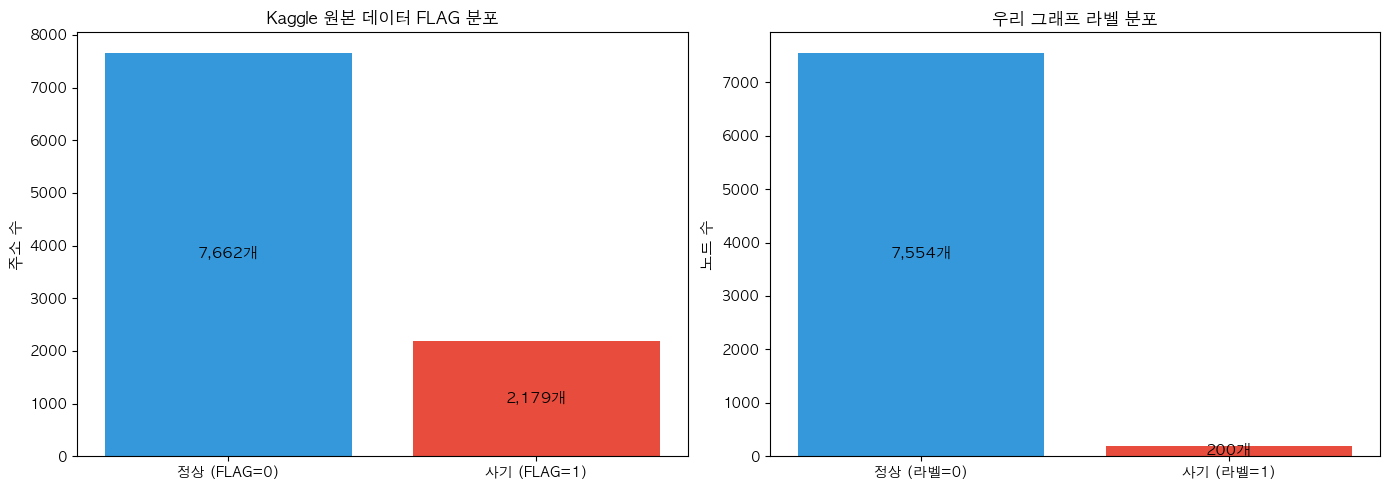

In [14]:
# FLAG 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Kaggle 원본 분포
kaggle_data = df['FLAG'].value_counts().sort_index()
axes[0].bar(['정상 (FLAG=0)', '사기 (FLAG=1)'], 
            [kaggle_data[0], kaggle_data[1]], 
            color=['#3498db', '#e74c3c'])
axes[0].set_title('Kaggle 원본 데이터 FLAG 분포', fontsize=12, fontweight='bold')
axes[0].set_ylabel('주소 수', fontsize=11)
axes[0].text(0, kaggle_data[0]//2, f'{kaggle_data[0]:,}개', 
             ha='center', va='center', fontsize=11, fontweight='bold')
axes[0].text(1, kaggle_data[1]//2, f'{kaggle_data[1]:,}개', 
             ha='center', va='center', fontsize=11, fontweight='bold')

# 우리 그래프 분포
graph_labels_data = {0: sum(1 for v in labels.values() if v == 0), 
                     1: sum(labels.values())}
axes[1].bar(['정상 (라벨=0)', '사기 (라벨=1)'], 
            [graph_labels_data[0], graph_labels_data[1]], 
            color=['#3498db', '#e74c3c'])
axes[1].set_title('우리 그래프 라벨 분포', fontsize=12, fontweight='bold')
axes[1].set_ylabel('노드 수', fontsize=11)
axes[1].text(0, graph_labels_data[0]//2, f'{graph_labels_data[0]:,}개', 
             ha='center', va='center', fontsize=11, fontweight='bold')
axes[1].text(1, graph_labels_data[1]//2, f'{graph_labels_data[1]:,}개', 
             ha='center', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


### 비율 및 샘플 수 비교


## 5. 결론 및 인사이트

### 주요 발견사항

#### 1. 데이터 크기
- **Kaggle 원본**: 9,841개 주소, 51개 특징
- **우리 그래프**: 7,692개 노드, 26,678개 엣지

#### 2. 클래스 분포
- **Kaggle**: 사기 22.14% (2,179개) vs 정상 77.86% (7,662개)
- **우리 그래프**: 사기 2.60% (200개) vs 정상 97.40% (7,554개)

#### 3. 비율 왜곡 원인
- 거래 상대방을 모두 포함하여 정상 노드 비율이 크게 증가
- 실제 거래 관계를 반영한 자연스러운 현상
- **의미**: 그래프 구조가 실제 Ethereum 네트워크를 더 잘 반영

#### 4. 매칭률
- Kaggle 사기 주소 2,179개 중 200개(9.2%) 선택
- 선택된 200개 모두 Kaggle FLAG=1 확인 ✓

### 다음 단계
- 불균형 문제를 고려한 모델 학습 전략 필요
- `class_weight='balanced'` 등 불균형 해결 기법 적용


NameError: name 'kaggle_data' is not defined

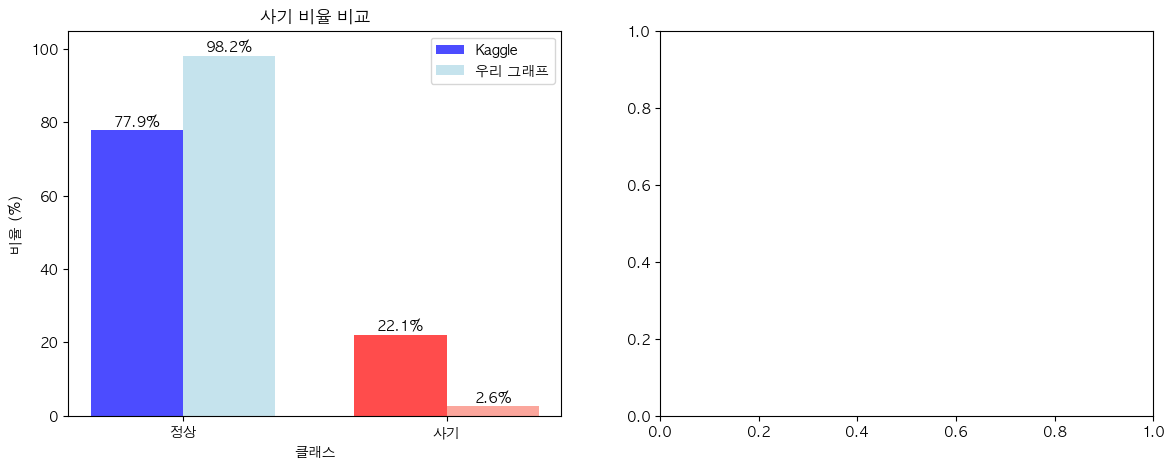

In [9]:
# 비율 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 비율 비교 (퍼센티지)
kaggle_pct = [df[df['FLAG']==0].shape[0] / len(df) * 100, 
              df[df['FLAG']==1].shape[0] / len(df) * 100]
graph_pct = [(len(labels)-sum(labels.values()))/len(graph_data['nodes'])*100,
             sum(labels.values())/len(graph_data['nodes'])*100]

x = np.arange(2)
width = 0.35

axes[0].bar(x - width/2, kaggle_pct, width, label='Kaggle', color=['blue', 'red'], alpha=0.7)
axes[0].bar(x + width/2, graph_pct, width, label='우리 그래프', color=['lightblue', 'salmon'], alpha=0.7)

axes[0].set_xlabel('클래스')
axes[0].set_ylabel('비율 (%)')
axes[0].set_title('사기 비율 비교')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['정상', '사기'])
axes[0].legend()
axes[0].set_ylim([0, 105])

# 퍼센티지 텍스트 추가
for i, (k, g) in enumerate(zip(kaggle_pct, graph_pct)):
    axes[0].text(i - width/2, k + 1, f'{k:.1f}%', ha='center', fontsize=10, fontweight='bold')
    axes[0].text(i + width/2, g + 1, f'{g:.1f}%', ha='center', fontsize=10, fontweight='bold')

# 샘플 수 비교 (로그 스케일)
axes[1].bar(x - width/2, [kaggle_data[0], kaggle_data[1]], width, 
            label='Kaggle', color=['blue', 'red'], alpha=0.7)
axes[1].bar(x + width/2, [graph_labels_data[0], graph_labels_data[1]], width, 
            label='우리 그래프', color=['lightblue', 'salmon'], alpha=0.7)

axes[1].set_xlabel('클래스')
axes[1].set_ylabel('샘플 수 (로그)')
axes[1].set_title('샘플 수 비교 (로그 스케일)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['정상', '사기'])
axes[1].legend()
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()
